### Load in the necessary libraries

In [36]:
# Scipy
import scipy as sp

# Numpy
import numpy as np

# Matplotlib.pyplot
import matplotlib.pyplot as plt

### State the constant values

In [37]:
Rd = 287
Cp = 1004
Po = 10**5
Rv = 461

a = 5800.2206
b = 1.3914993
c = 0.048640239
d = 0.000041764768
e = 0.000000014452093
f = 6.5459673

### Create the temperature and pressure arrays

In [38]:
# Temperature in Celsius
Temperature = np.arange(-30, 40.1, 0.1)

# Convert temperature into Kelvin
Temp_K = Temperature + 273.15

# Pressure in hPa
Pressure = np.arange(250, 1051, 1)

# Determining the length of the temperature and pressure arrays
Temp_length = len(Temperature)
Press_length = len(Pressure)

### Calculate the potential temperature

In [39]:
# Creating a 2D potential temperature array
Theta = np.zeros((Press_length, Temp_length))

# Loop that goes through the length of the pressure array
for i in range(Press_length):
    # Loop that goes through the length of the temperature array
    for j in range(Temp_length):
        # Potential temperature equation
        Theta[i, j] = Temp_K[j] * ((1000 / Pressure[i]) ** (Rd / Cp)) # [K]

### Calculate the saturation vapor pressure

In [40]:
es = np.exp((-a / Temp_K) + b - (c * Temp_K) + (d * (Temp_K **2)) - (e * (Temp_K **3)) + (f * np.log(Temp_K)))

### Calculate the mixing ratio

In [41]:
mix_ratio = np.zeros((Press_length, Temp_length))

for i in range(Press_length):
    for j in range(Temp_length):
        mix_ratio[i, j] = (Rd / Rv) * ((es[j] / 100) / (Pressure[i] - (es[j] / 100)))

### State the range for the contour plot function

In [42]:
# Potential temperature
Theta_contour = np.arange(250, 470.1, 10)

# Mixing ratio
MR_contour = [0.5, 1, 2, 3, 4, 6, 8, 11, 15, 20, 30, 50, 75, 125]

### Plot

Text(0, 0.5, 'Pressure (mb)')

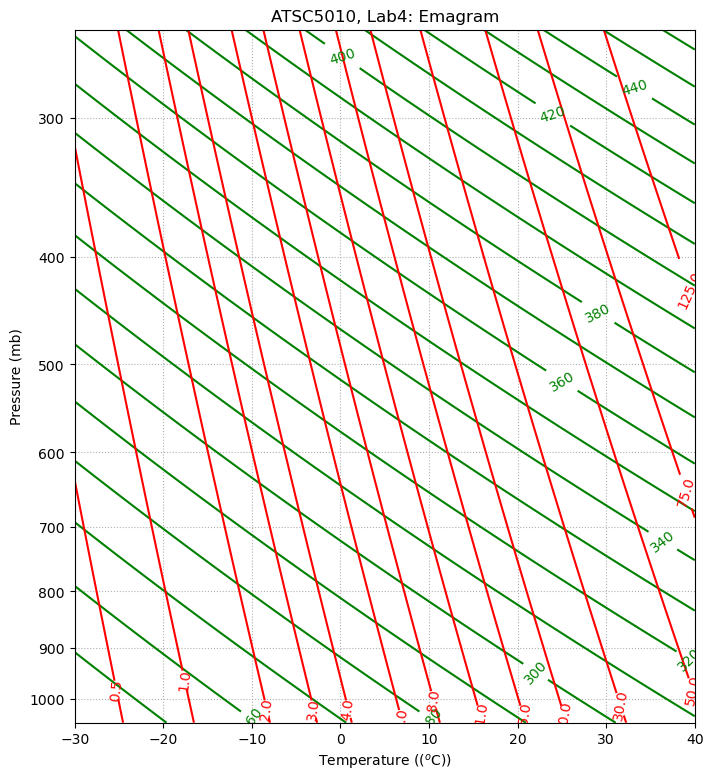

In [43]:
# Set up figure
plt.figure(figsize=(8, 9), facecolor = 'white')
# Plot potential temperature
pt = plt.contour(Temperature, Pressure, Theta, Theta_contour, colors = 'green')
# Plot mixing ratio
mr = plt.contour(Temperature, Pressure, mix_ratio * 1000, MR_contour, colors = 'red')
# Label the potential temperature contours
plt.clabel(pt, np.arange(260, 460, 20), inline=1)
# Label the mixing ratio contours
plt.clabel(mr, MR_contour, inline = 1)
# Turn the y-axis into a log scale
plt.yscale('log')
# Invert the y-axis
plt.gca().invert_yaxis()
# Set y-axis limits
plt.ylim(1050, 250)
# Specify the y-axis tick marks
plt.yticks(np.arange(300, 1050.1, 100), ['300', '400', '500', '600', '700', '800', '900', '1000'])
# Specify the grid line type
plt.grid(linestyle='dotted')
# Plot title
plt.title('ATSC5010, Lab4: Emagram')
# X-axis label
plt.xlabel('Temperature (($^o$C))')
# Y-axis label
plt.ylabel('Pressure (mb)')